In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [76]:
zip_train = pd.read_csv('ziptrain.csv')
zip_test = pd.read_csv('ziptest.csv')

In [77]:
#drop index column
zip_train.drop(zip_train.columns[0], axis=1, inplace=True)
zip_test.drop(zip_test.columns[0], axis=1, inplace=True)

In [78]:
# get 2's and 3's
zip_train_2_3 = zip_train[(zip_train.V1 == 2) | (zip_train.V1 == 3)]
zip_test_2_3 = zip_test[(zip_test.V1 == 2) | (zip_test.V1 == 3)]

In [92]:
#split fetures and label
train_Y = zip_train_2_3.iloc[:, :1]
train_X = zip_train_2_3.iloc[:, 1:]

In [93]:
#split fetures and label
test_Y = zip_test_2_3.iloc[:, :1]
test_X = zip_test_2_3.iloc[:, 1:]

In [112]:
# perform LinearRegression
start = time.time()
lr = LinearRegression().fit(train_X, train_Y)
acu = lr.score(test_X, test_Y)
end = time.time()
print('accuracy = %f, runtime = %f'%(acu, end-start))

train:0.900478
accuracy = 0.388613, runtime = 0.060835


In [110]:
# train knn with k = [1,3,5,7,9,11,13,15]
# get train errors and test errors

ks = [1,3,5,7,9,11,13,15]
train_errs = []
test_errs = []

for k in ks:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_Y)
    train_err = 1 - knn.score(train_X, train_Y)
    train_errs.append(train_err)
    test_err = 1 - knn.score(test_X, test_Y)
    test_errs.append(test_err)
    end = time.time()
    print('k = %d, training error = %f, testing error = %f, runtime = %f'%(k, train_err, test_err, end-start))

k = 1, training error = 0.000000, testing error = 0.024725, runtime = 2.715527
k = 3, training error = 0.005040, testing error = 0.030220, runtime = 5.057316
k = 5, training error = 0.005760, testing error = 0.030220, runtime = 5.208637
k = 7, training error = 0.006479, testing error = 0.032967, runtime = 5.417434
k = 9, training error = 0.009359, testing error = 0.035714, runtime = 5.320968
k = 11, training error = 0.008639, testing error = 0.035714, runtime = 5.272183
k = 13, training error = 0.008639, testing error = 0.038462, runtime = 5.120907
k = 15, training error = 0.009359, testing error = 0.038462, runtime = 5.183169


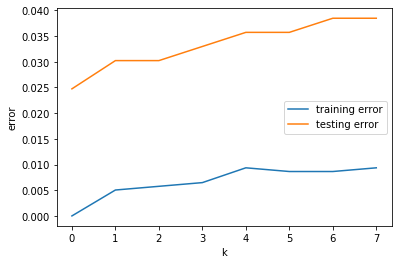

In [107]:
#plt errors

plt.plot(train_errs)
plt.plot(test_errs)
plt.ylabel('error')
plt.xlabel('k')
plt.legend(('training error', 'testing error'), loc='right')